In [2]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


First 5 rows of dataset:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        21

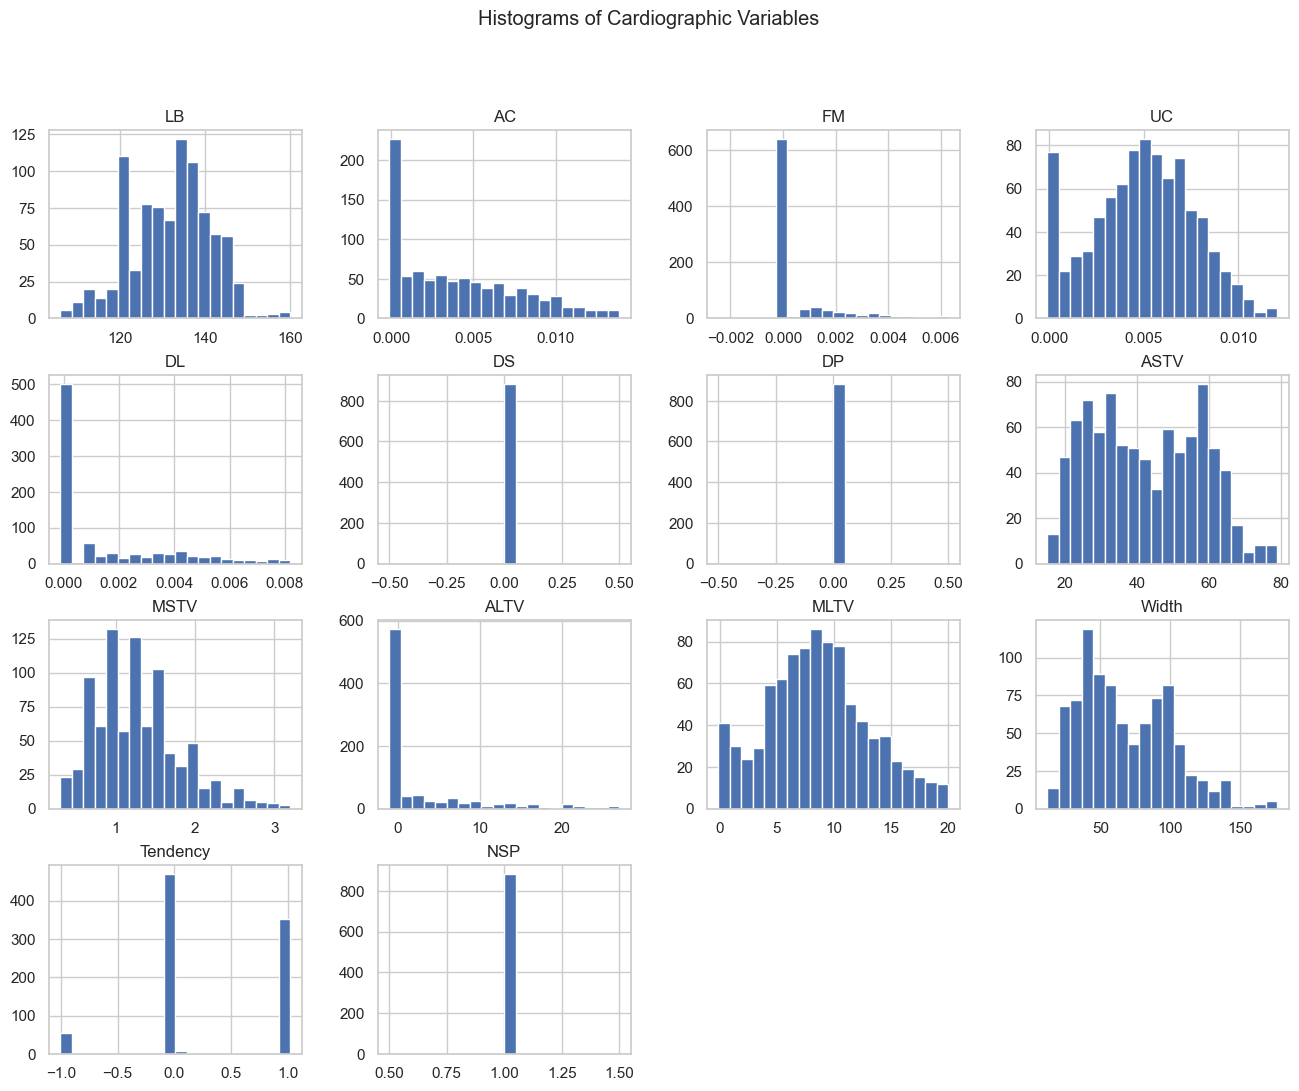

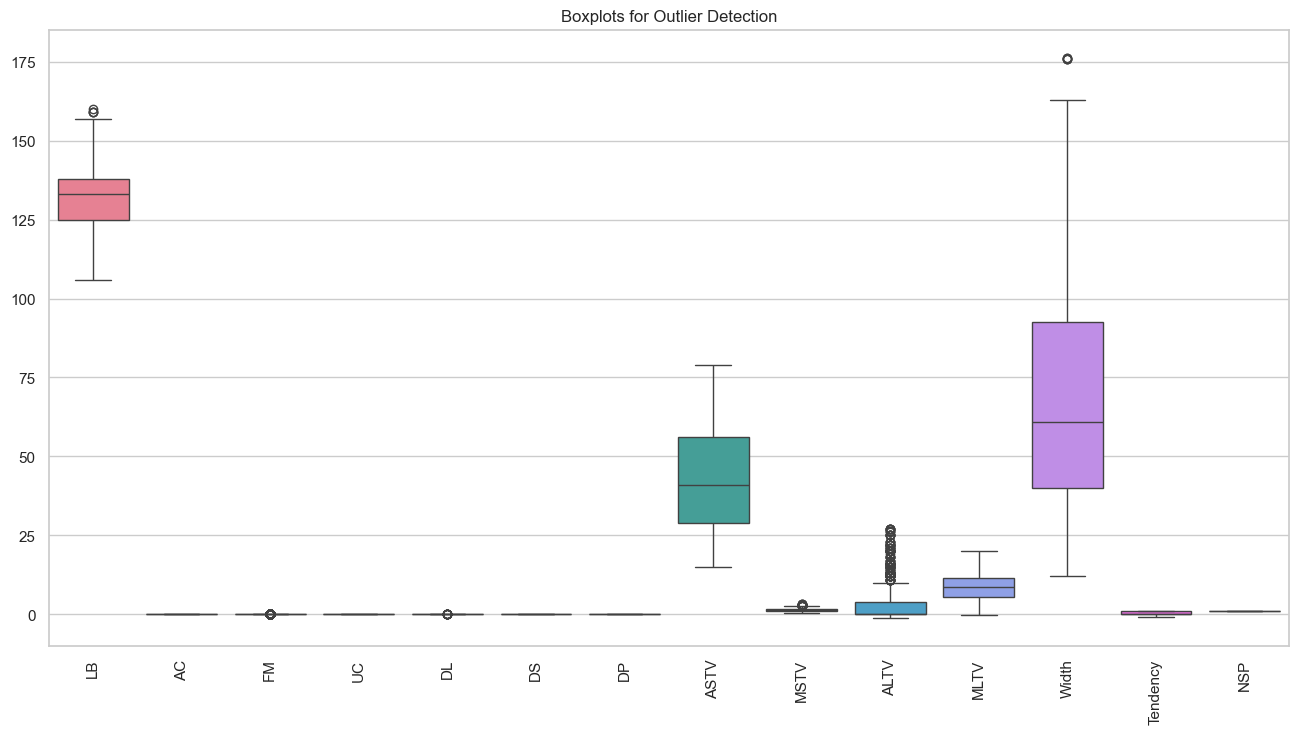

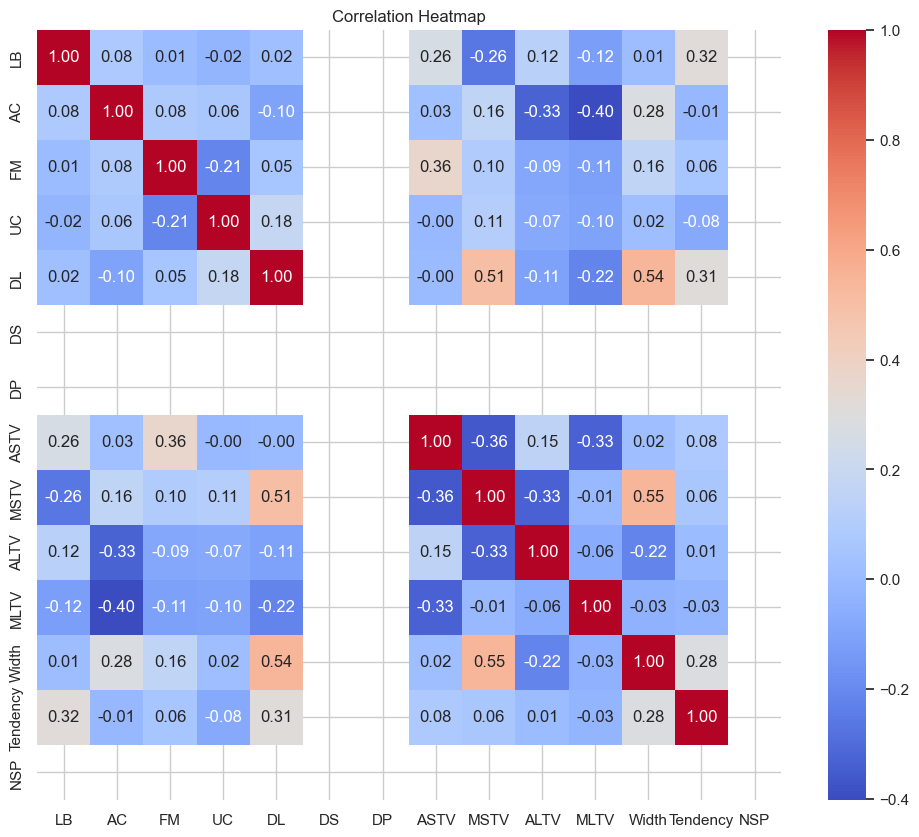

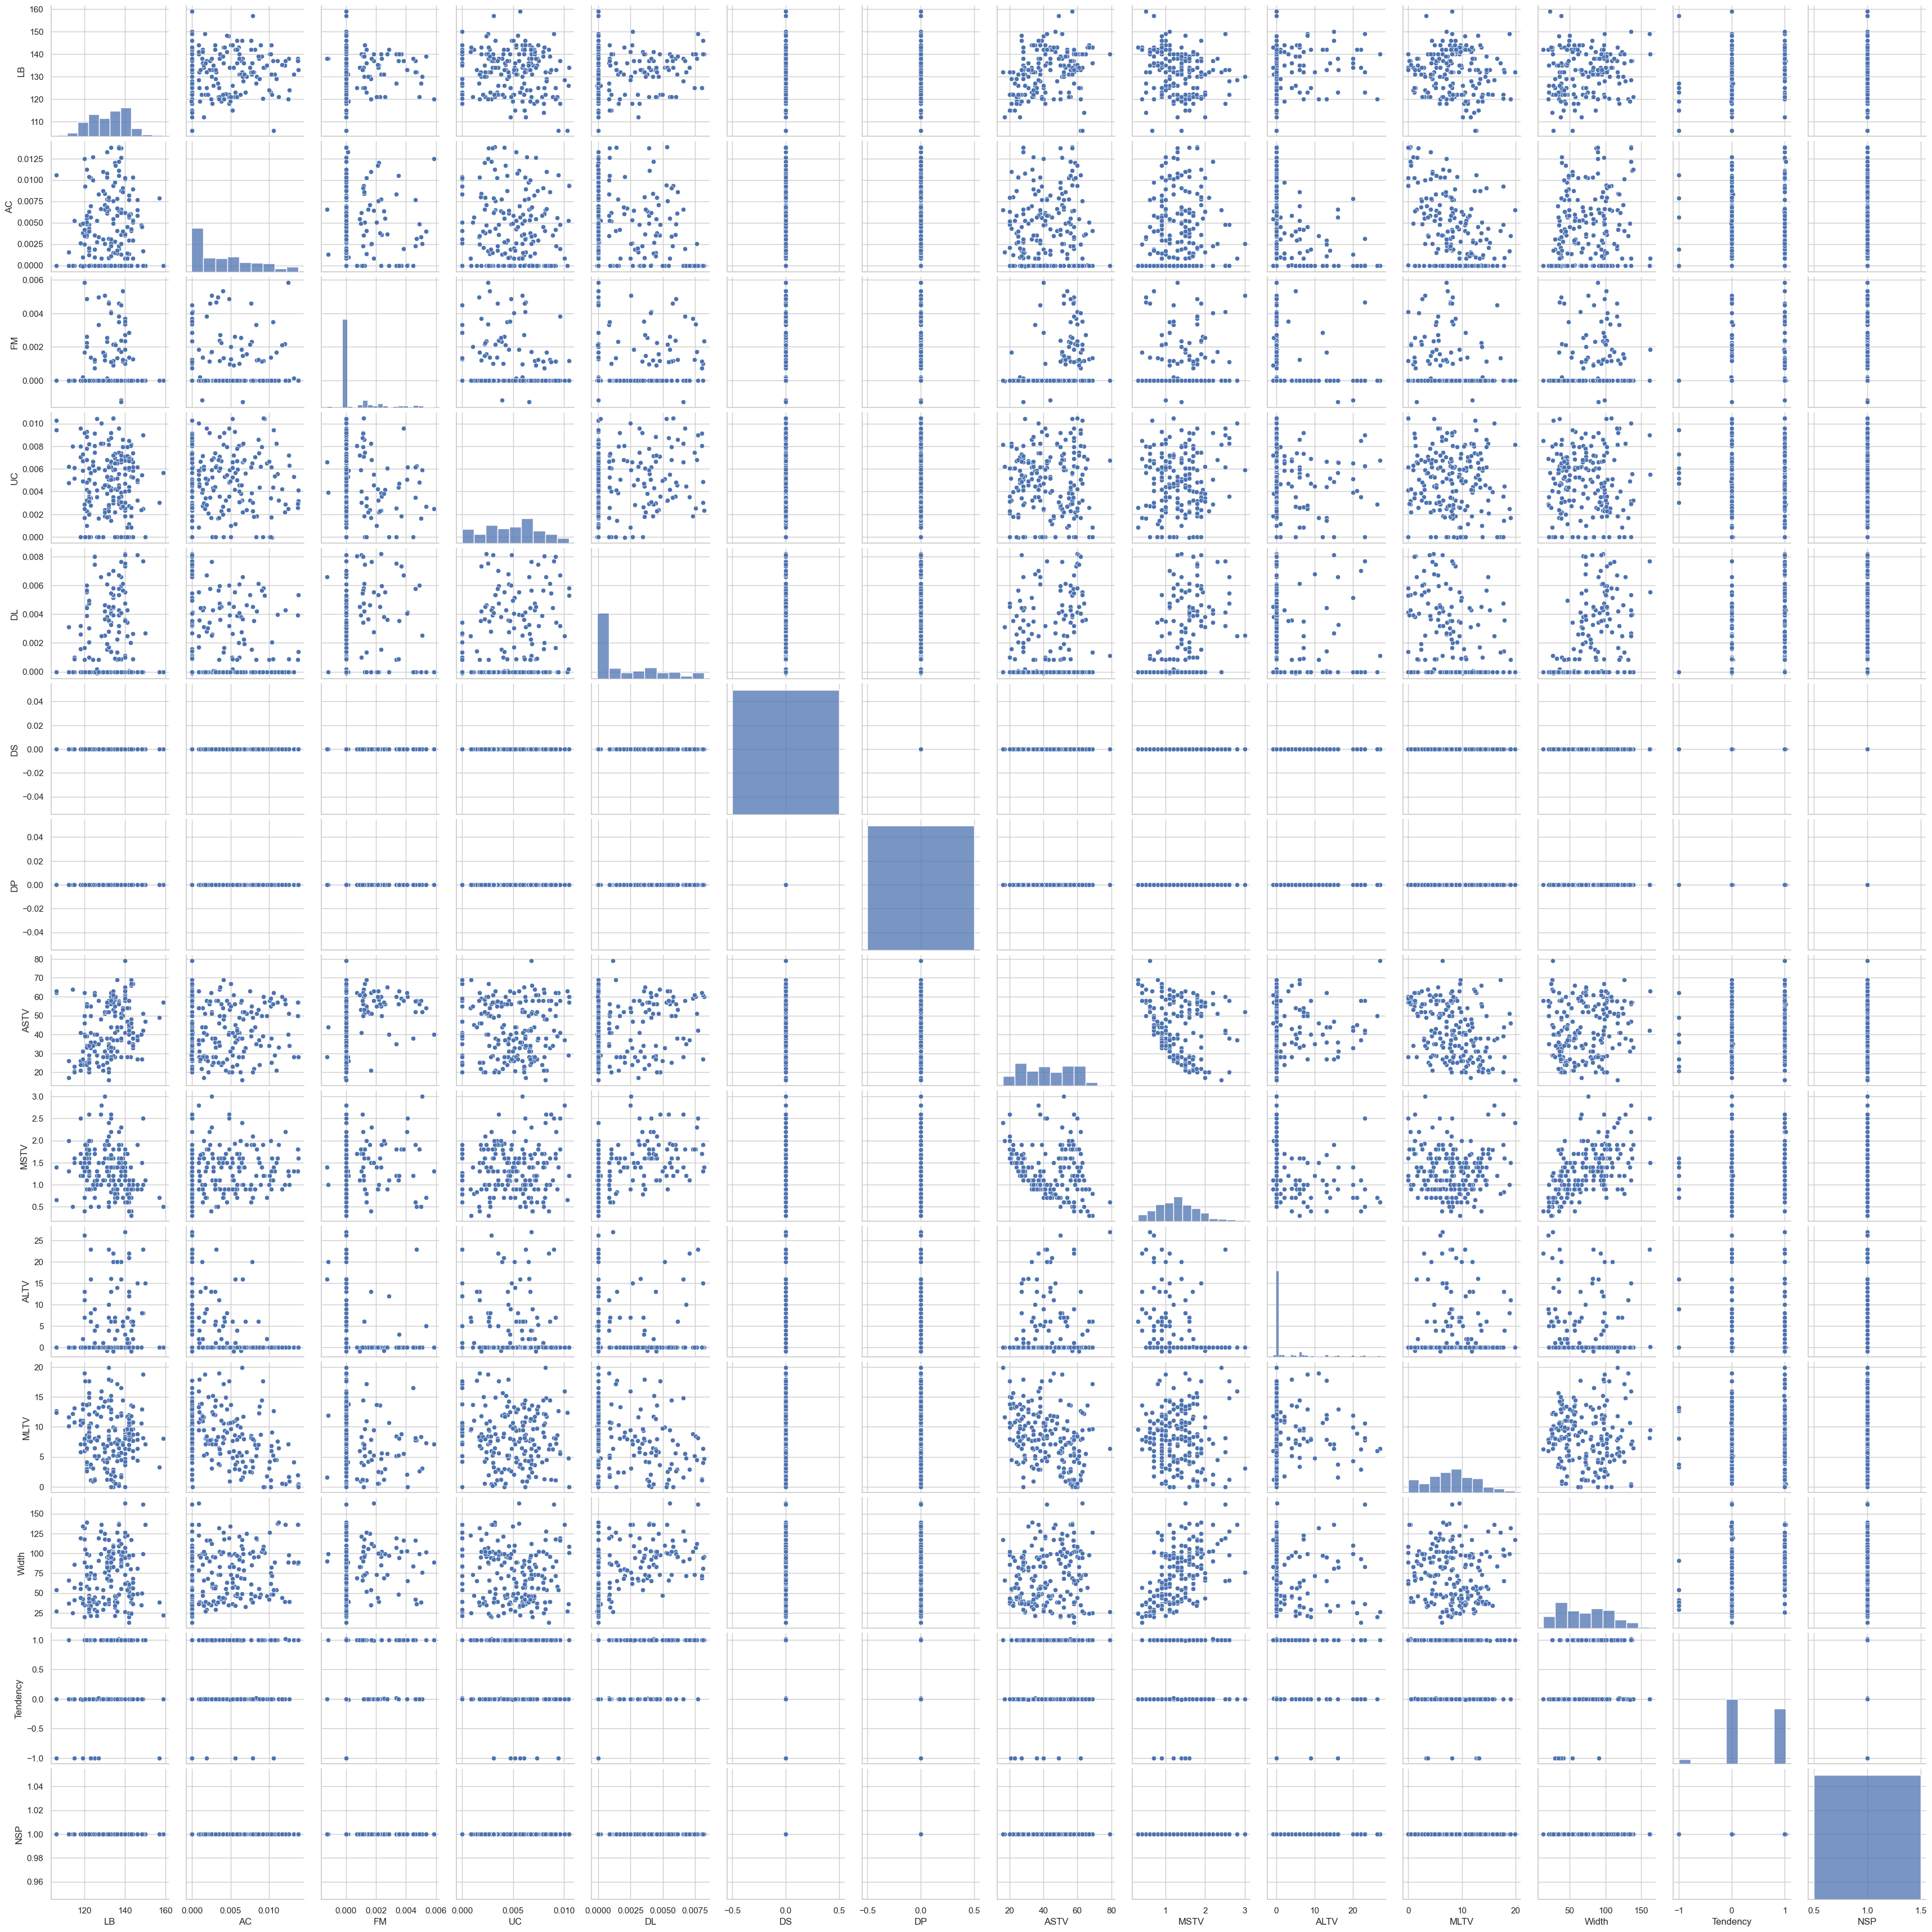

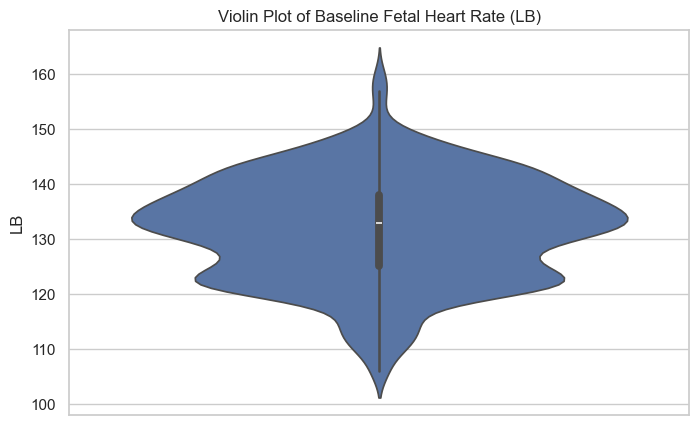


Strong Correlations:
           LB   AC   FM   UC   DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0 NaN NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN NaN NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
df = pd.read_csv("cardiotocographic.csv")
print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nShape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)
print("\nStatistical Summary:")
summary = df_cleaned.describe()
print(summary)
median = df_cleaned.median()
iqr = df_cleaned.quantile(0.75) - df_cleaned.quantile(0.25)

print("\nMedian Values:")
print(median)

print("\nInterquartile Range (IQR):")
print(iqr)
df_cleaned.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms of Cardiographic Variables")
plt.show()
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection")
plt.show()
plt.figure(figsize=(12, 10))
corr = df_cleaned.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(df_cleaned.sample(200))  # sampling for performance
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(y=df_cleaned["LB"])
plt.title("Violin Plot of Baseline Fetal Heart Rate (LB)")
plt.show()
strong_corr = corr[(corr > 0.6) | (corr < -0.6)]
print("\nStrong Correlations:")
print(strong_corr)
print("\nFinal Cleaned Dataset:")
print(df_cleaned.head())
